### Spatial Filter Basics

In [1]:
import cv2
from PIL import Image
import numpy as np

(688, 688)


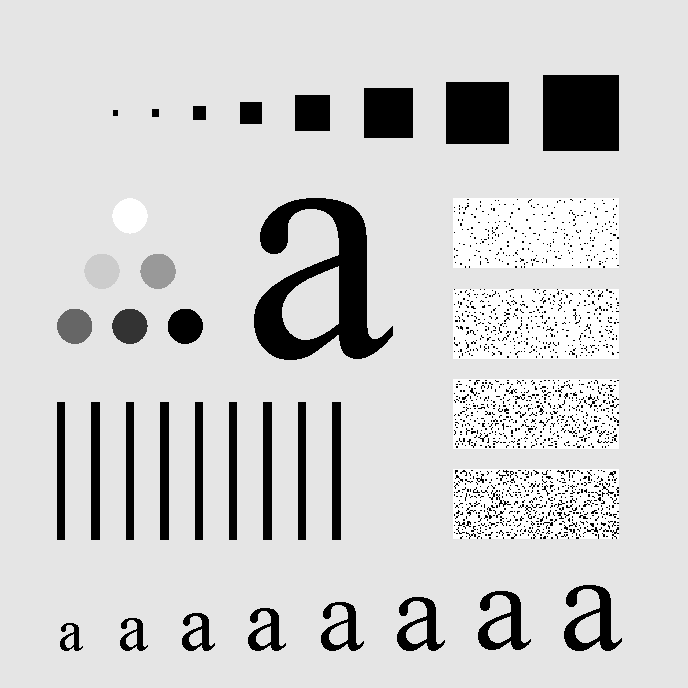

In [2]:
img = cv2.imread('smoothing.tif', 2)
print img.shape
Image.fromarray(img)

### Generic function that does the spatial filtering depending on the filter that is provided

In [3]:
def spatialfilter(img, arrayfilter):
    #imgshow = Image.fromarray(img)
    #imgshow.show()
    
    newimg          = img.copy()
    [height, width] = img.shape
    [filtersize, a] = arrayfilter.shape
    b               = (a-1) / 2 # b is the steps needed to get to the center of the arrayfilter index and like wise
    

    for y in range(height):
        for x in range(width):
            endy = a+y
            endx = a+x
            if endy < height and endx < width: # Taking boundaries into account and ignoring them 
                arraytemp    = np.multiply(arrayfilter, img[y:endy, x:endx])
                newimg[y+b][x+b] = arraytemp.sum()
    
    newimgshow = Image.fromarray(newimg)
    #newimgshow.show()
    return newimgshow
                
        

### Task 1
#### Size 3, 5, 15 and 35 by 35 filters for Effect of averaging and the size of averaging filters

In [4]:
filtersize  = 3
arrayfilter = np.ones((filtersize, filtersize)) * 1/(filtersize*filtersize)

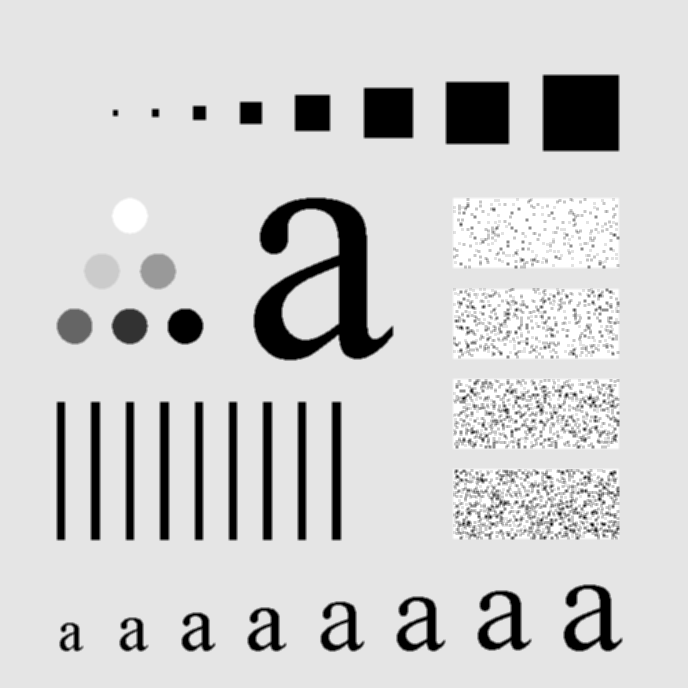

In [5]:
spatialfilter(img, arrayfilter )

In [6]:
filtersize  = 5
arrayfilter = np.ones((filtersize, filtersize)) * 1/(filtersize*filtersize)

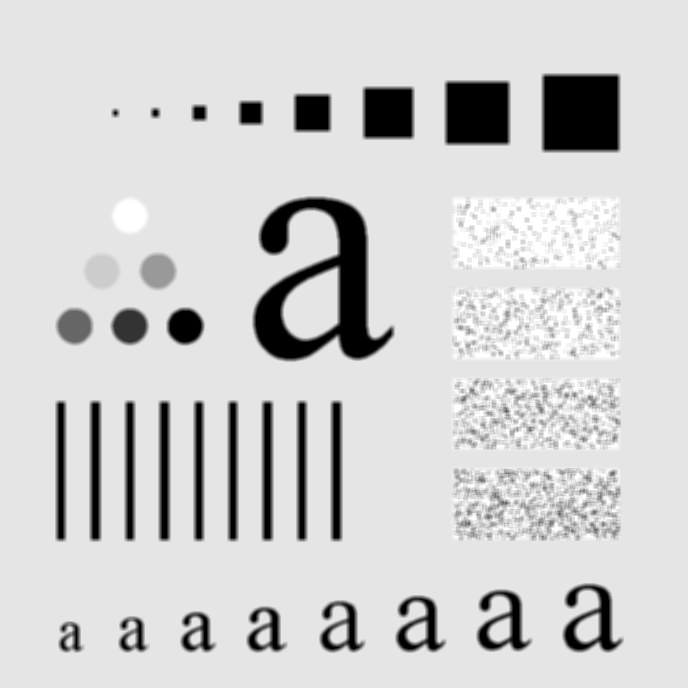

In [7]:
spatialfilter(img, arrayfilter )

In [8]:
filtersize  = 15
arrayfilter = np.ones((filtersize, filtersize)) * 1/(filtersize*filtersize)

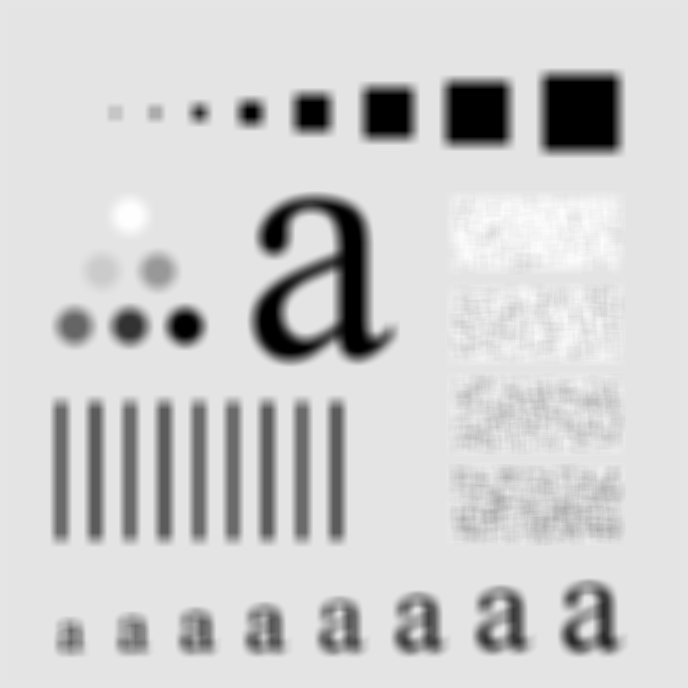

In [9]:
spatialfilter(img, arrayfilter )

In [10]:
filtersize  = 35
arrayfilter = np.ones((filtersize, filtersize)) * 1/(filtersize*filtersize)

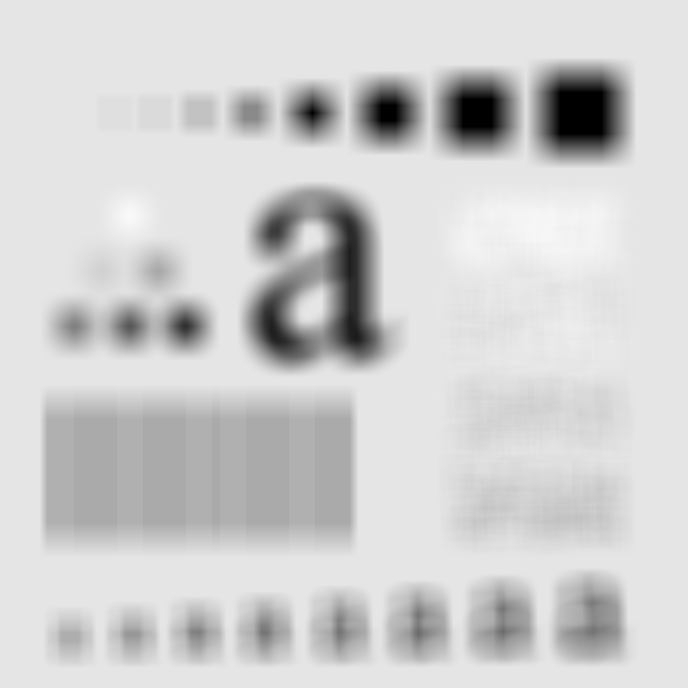

In [11]:
spatialfilter(img, arrayfilter )

### The output makes it clear that increasing the window size can both help and ruin the image

#### Weighted filter

In [12]:
arrayfilter = np.array(([ [1,2,1],[2,4,2],[1,2,1] ]), np.float16) * 1/16
arrayfilter

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]], dtype=float16)

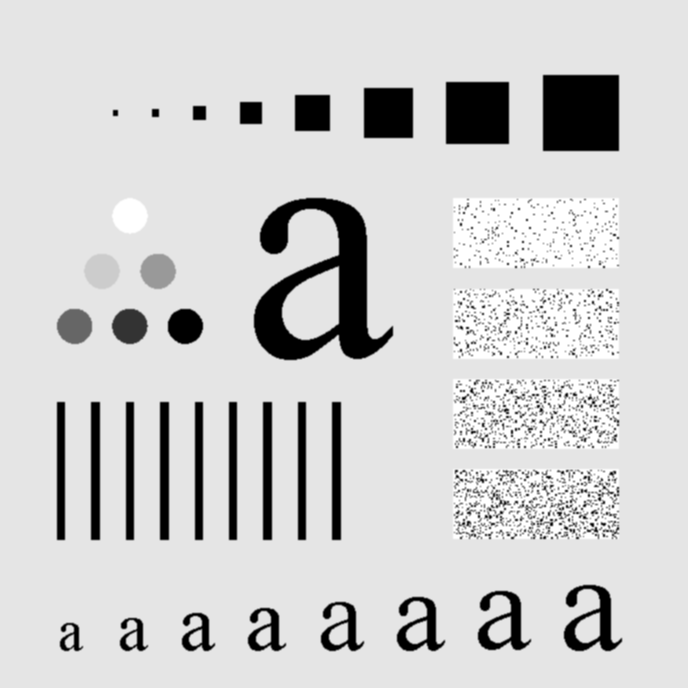

In [13]:
spatialfilter(img, arrayfilter )

### Task2
#### Gaussian smoothing

In [14]:
def gaussian(s,x,y):
    z = (np.power(x,2) + np.power(y,2) ) / (2 * np.power(s,2))
    r = np.exp(-z) / (2*np.pi*np.power(s,2))
    return r

def gaussianfilter(filtersize, S):
    arrayfilter     = np.ones((filtersize, filtersize))
    [a,b]           = arrayfilter.shape
    b               = (a-1) / 2
    aaxis           = np.linspace(-b,b,a).astype(np.int8)
    baxis           = np.linspace(-b,b,a).astype(np.int8)
    
    for s in aaxis:
        for t in baxis:
            arrayfilter[s+b][t+b] = gaussian(S,abs(s),abs(t))
    return arrayfilter
    

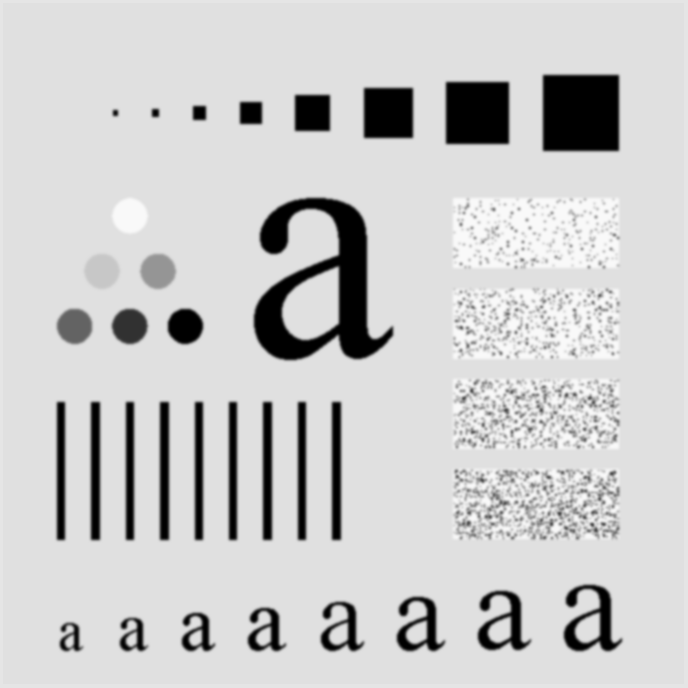

In [15]:
arrayfilter = gaussianfilter(7, 1.4)
spatialfilter(img, arrayfilter )

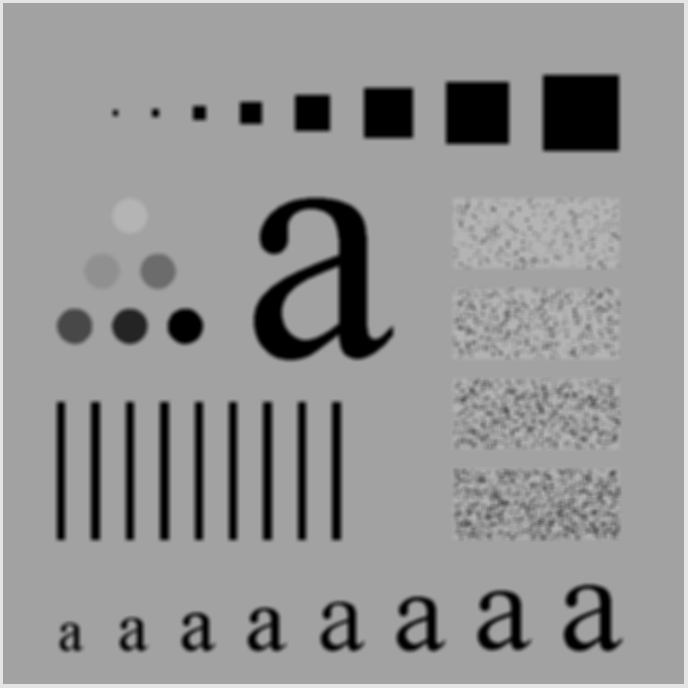

In [16]:
arrayfilter = gaussianfilter(7, 2.5)
spatialfilter(img, arrayfilter )

### Applying bigger S darkens the image. The blur effect seems to be the same

### Task 3

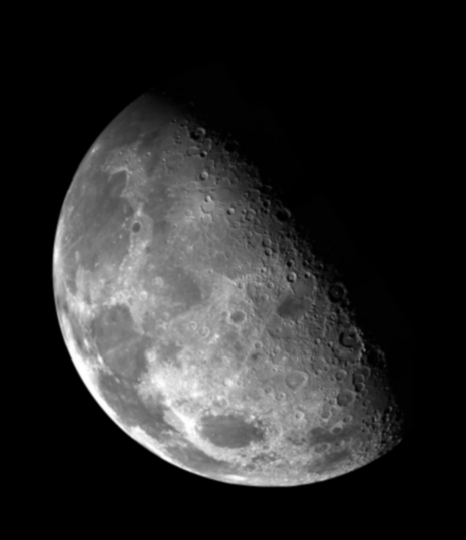

In [17]:
img = cv2.imread('unsharpmasking.tif',2)
Image.fromarray(img)

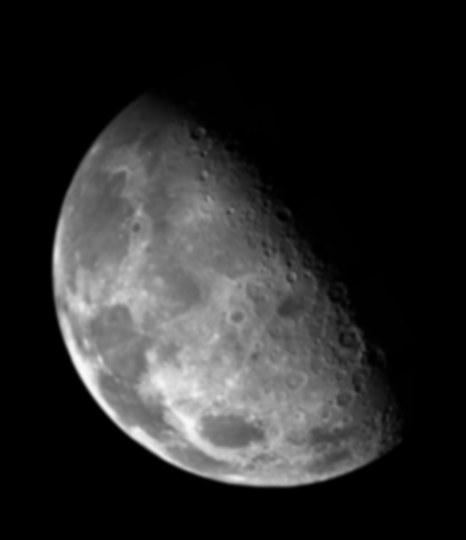

In [18]:
arrayfilter = gaussianfilter(7, 1.4)
newimgshow = spatialfilter(img, arrayfilter )
newimg = np.asarray(newimgshow)
newimgshow

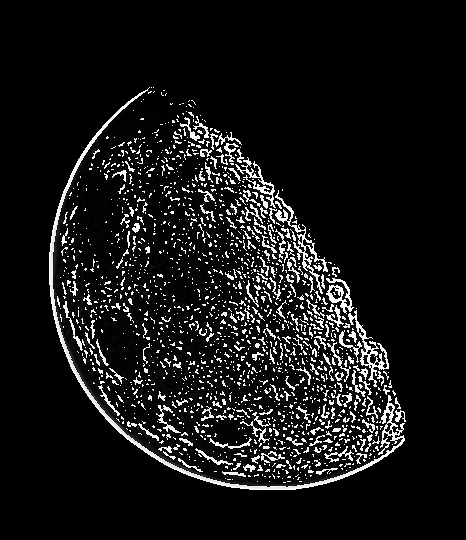

In [19]:
subimg = np.subtract(img, newimg)
Image.fromarray(subimg)

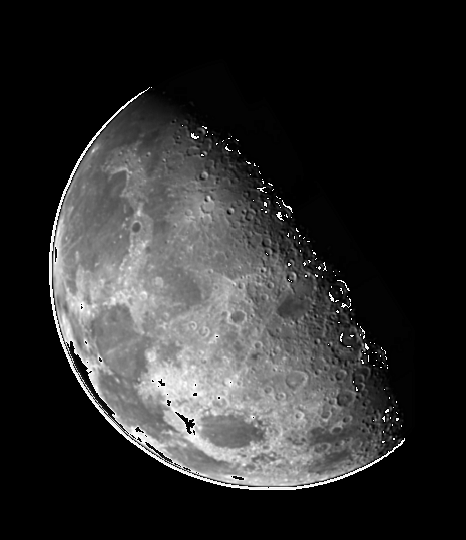

In [20]:
unsharpimg = np.add(subimg, img)
Image.fromarray(unsharpimg)

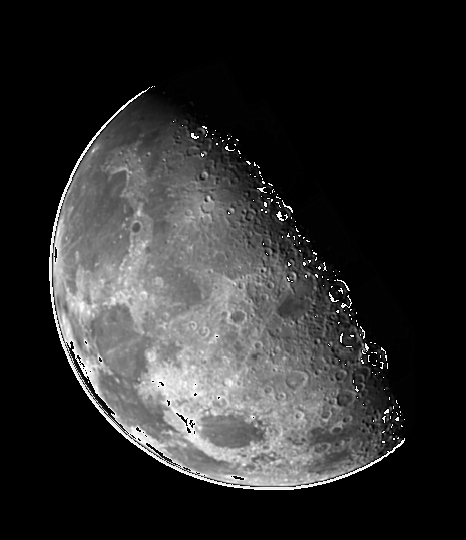

In [21]:
filtersize  = 5
arrayfilter = np.ones((filtersize, filtersize)) * 1/(filtersize*filtersize)
newimg = np.asarray(spatialfilter(img, arrayfilter ))
subimg = np.subtract(img, newimg)
unsharpimg = np.add(subimg, img)
Image.fromarray(unsharpimg)

### Task 4

In [22]:
def medianfilter(img, filtersize):
   
    newimg          = img.copy()
    [height, width] = img.shape
    a               = filtersize
    b               = (a-1) / 2 # b is the steps needed to get to the center of the arrayfilter index and like wise
 
    
    for y in range(height-a):
        for x in range(width-a):
            endy        = a+y
            endx        = a+x 
            A           = img[y:endy, x:endx].flatten()
            orderarray  = np.sort(A, axis=None)     
            newimg[y+b][x+b] = orderarray[(len(orderarray)+1)/2]
    
    newimgshow = Image.fromarray(newimg)
    return newimgshow

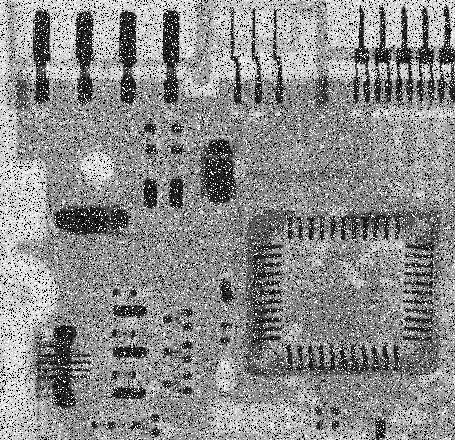

In [23]:
img = cv2.imread('saltandpaper.tif',2)
Image.fromarray(img)

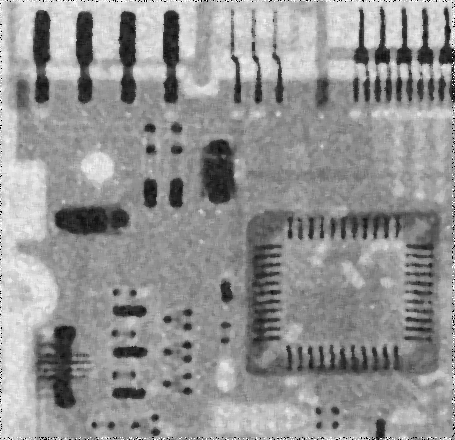

In [24]:
medianfilter(img,5)

### Task 5
Sobel operator is used for getting the horizontal and vertical edges

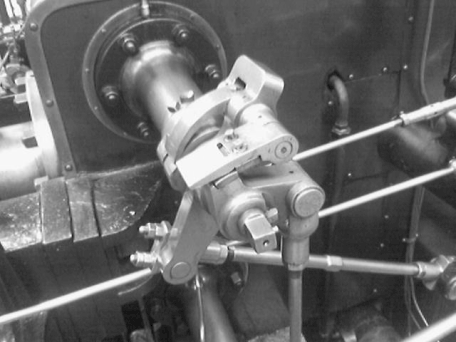

In [25]:
#img = cv2.imread('two_cats.jpg',2)
img = cv2.imread('engine_edge.png',2)
Image.fromarray(img)

In [26]:
#img = np.asarray(medianfilter(img,5))

In [27]:
arrayverticalfilter    = np.array(([ [-1,-2,-1],[0,0,0],[1,2,1] ]), np.float64)
arrayhorizontalfilter  = np.array(([ [-1,0,1],[-2,0,2],[-1,0,1] ]), np.float64)


int16


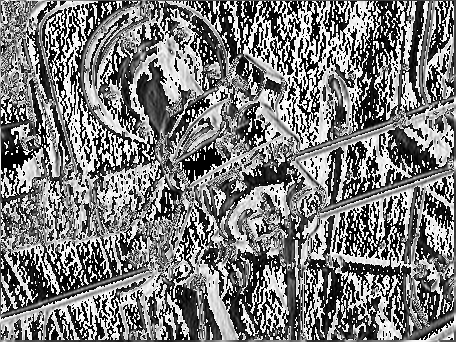

In [28]:
horizontalshow  = spatialfilter(img, arrayhorizontalfilter)
horizontaledges = np.asarray(horizontalshow, np.int16)
print horizontaledges.dtype
horizontalshow

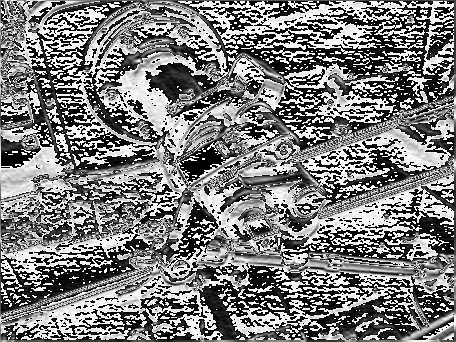

In [29]:
verticalshow    = spatialfilter(img, arrayverticalfilter)
verticaledges   = np.asarray(verticalshow , np.int16)
verticalshow

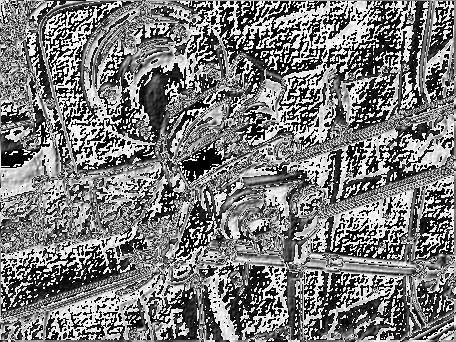

In [30]:
Image.fromarray(np.add(horizontaledges,verticaledges).astype(np.uint8))

C:\Users\Pavilion 15\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


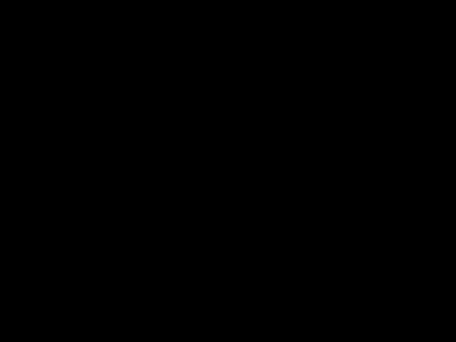

In [33]:
val             = np.sqrt( np.add( np.power(horizontaledges,2) , np.power(verticaledges,2) ) )
val             *= (255.0 / np.max(val))                    
edgeimg         = (val).astype(np.uint8)
Image.fromarray(edgeimg)